# 붓꽃 데이터 예측

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [5]:
iris = load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [7]:
print(iris.feature_names) # 꽃잎, 꽃받침 길이 너비
print(iris.target_names) # 클래스 이름

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [12]:
X = iris.data #150*4
y = iris.target #150*1

# 80:20
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)

print(X_train.shape) # 120/150
print(X_test.shape) # 30/150
print(y_train.shape) # 120/150
print(y_test.shape) # 30/150

(120, 4)
(30, 4)
(120,)
(30,)


## 1. KNN

In [9]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [23]:
y_pred = knn.predict(X_test)
scores = metrics.accuracy_score(y_test, y_pred) # 평가 - 정확도 (예측/test)
knn.predict_proba(X_test) # 실제 예측한 확률

array([[0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.16666667, 0.83333333],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.16666667, 0.83333333],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.

In [14]:
classes = {0:'setosa', 1:'versicolor', 2:'virginica'}

x_new = [[3,4,5,2], [5,4,2,2]]
y_predict = knn.predict(x_new) # x_new에 대해서 예측
print(y_predict) # 예측된 클래스 값 반환

print(classes[y_predict[0]]) 
print(classes[y_predict[1]])

[1 0]
versicolor
setosa


## 2. Perceptron

In [15]:
import matplotlib as mpl

In [17]:
# 시각화 위해 4개 특징 중 0,2만 선택
idx = np.in1d(iris.target, [0,2])
X = iris.data[idx, :2]
y = (iris.target[idx] / 2).astype(np.int)

print(X)
print(y)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [6.3 3.3]
 [5.8 2.7]
 [7.1 3. ]
 [6.3 2.9]
 [6.5 3. ]
 [7.6 3. ]
 [4.9 2.5]
 [7.3 2.9]
 [6.7 2.5]
 [7.2 3.6]
 [6.5 3.2]
 [6.4 2.7]
 [6.8 3. ]
 [5.7 2.5]
 [5.8 2.8]
 [6.4 3.2]
 [6.5 3. ]
 [7.7 3.8]
 [7.7 2.6]
 [6.  2.2]
 [6.9 3.2]
 [5.6 2.8]
 [7.7 2.8]
 [6.3 2.7]
 [6.7 3.3]
 [7.2 3.2]
 [6.2 2.8]
 [6.1 3. ]
 [6.4 2.8]
 [7.2 3. ]
 [7.4 2.8]
 [7.9 3.8]
 [6.4 2.8]
 [6.3 2.8]
 [6.1 2.6]
 [7.7 3. ]
 [6.3 3.4]
 [6.4 3.1]
 [6.  3. ]
 [6.9 3.1]
 [6.7 3.1]

C:\Users\HP1\AppData\Local\Temp\ipykernel_608\91159732.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target[idx] / 2).astype(np.int)


In [18]:
# Main point - 모델 파라미터 설정
model = Perceptron(max_iter=300, shuffle=False, tol=0, n_iter_no_change=1e9).fit(X,y)

#시각화 - 최소,최대 리밋
XX_min = X[:,0].min()-1
XX_max = X[:,0].max()+1
YY_min = X[:,1].min()-1
YY_max = X[:,1].max()+1

# 시각화 - meshgrid
XX,YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000),
                    np.linspace(YY_min, YY_max, 1000))

# 예측
ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)

c:\Users\HP1\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [21]:
# 한글 깨짐 수정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

C:\Users\HP1\AppData\Local\Temp\ipykernel_608\2847117055.py:3: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y==1, 0], X[y== 1,1], c='k', s=100, marker='x', edgecolors='k')


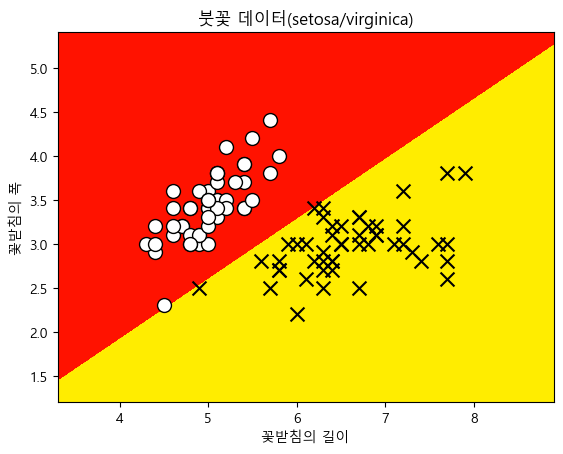

In [22]:
# 시각화
plt.contourf(XX,YY,ZZ, cmap = mpl.cm.autumn)
plt.scatter(X[y==0, 0], X[y== 0,1], c='w', s=100, marker='o', edgecolors='k')
plt.scatter(X[y==1, 0], X[y== 1,1], c='k', s=100, marker='x', edgecolors='k')
plt.xlabel("꽃받침의 길이")
plt.ylabel("꽃받침의 폭")
plt.title("붓꽃 데이터(setosa/virginica)")
plt.xlim(XX_min, XX_max)
plt.ylim(YY_min, YY_max)
plt.grid(False)
plt.show()

# 실습 - Lab 2

In [51]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
#import numpy as np
#import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.naive_bayes import CategoricalNB # 나이브 베이즈
from sklearn.ensemble import AdaBoostClassifier # AdaBoost
from sklearn.tree import DecisionTreeClassifier # 결정 트리

# 1. CategoricalNB (Naive Bayes for Categorical Data)
**alpha**: 라플라스 스무딩을 위한 파라미터로, 0 이상의 값을 가질 수 있습니다. 값이 크면 모델이 더욱 부드럽게 일반화됩니다. 

**fit_prior**: 클래스 priors를 추정할지 여부를 결정합니다. 기본값은 True입니다.

**class_prior**: 클래스의 사전 확률을 설정할 수 있습니다. 이 값을 설정하면 fit_prior가 False로 설정됩니다.

# 2. AdaBoostClassifier
**base_estimator**: 기본 추정기를 설정합니다. 기본값은 DecisionTreeClassifier입니다.
**n_estimators**: 사용할 기본 추정기의 수로, 너무 많으면 과적합이 발생할 수 있습니다. 기본값은 50입니다.

**learning_rate**: 각 기본 추정기가 모델에 기여하는 정도를 조정합니다. 값이 클수록 학습 속도가 빨라지지만 과적합의 위험이 있습니다.

**algorithm**: ‘SAMME’ 또는 ‘SAMME.R’를 선택할 수 있으며, 기본값은 ‘SAMME.R’입니다. 후자는 확률적 출력을 사용하는 방법입니다.

# 3. DecisionTreeClassifier
**criterion**: 노드를 분할하기 위한 기준으로, ‘gini’ 또는 ‘entropy’를 선택할 수 있습니다. 기본값은 ‘gini’입니다.

**max_depth**: 트리의 최대 깊이를 제한합니다. 과적합을 방지하기 위해 사용합니다.

**min_samples_split**: 노드를 분할하기 위해 필요한 최소 샘플 수로, 기본값은 2입니다. 이 값을 늘리면 모델의 복잡성을 줄일 수 있습니다.

**min_samples_leaf**: 리프 노드에 있어야 하는 최소 샘플 수입니다. 기본값은 1입니다. 이 값을 조정하면 과적합을 방지할 수 있습니다.


In [52]:
# random_state=4
def main():
    X_train, X_test, y_train, y_test = load_data()
    Naive = CategoricalNB()
    AdaBoost = AdaBoostClassifier()
    Decision = DecisionTreeClassifier()
    model_List = [Naive, AdaBoost, Decision]
    for model in model_List:
        model, scores = model_ML(model, X_train, y_train, X_test, y_test)
        print(model, f'{scores*100:.2f} %')
        
def load_data():
    iris = load_iris()
    X = iris.data #150*4
    y = iris.target #150*1
    # 80:20
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)
    return X_train, X_test, y_train, y_test

def model_ML(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores = metrics.accuracy_score(y_test, y_pred)
    return model, scores

main()

CategoricalNB() 90.00 %
AdaBoostClassifier() 93.33 %
DecisionTreeClassifier() 96.67 %


# MNIST 숫자 분류

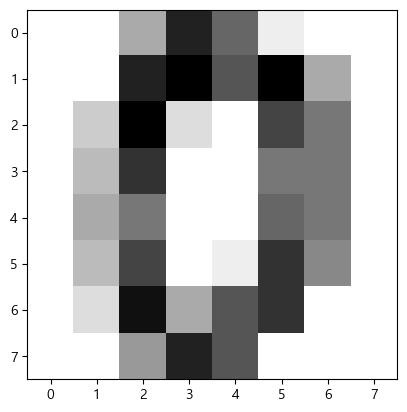

In [41]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [44]:
# 이미지 평탄화
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [50]:
X_train, X_test, y_train, y_test = train_test_split(data,digits.target,test_size=0.2, random_state=4)

print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape)
print(y_test.shape)

(1437, 64)
(360, 64)
(1437,)
(360,)


In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [47]:
y_pred = knn.predict(X_test)
scores = metrics.accuracy_score(y_test, y_pred)
scores

0.9805555555555555

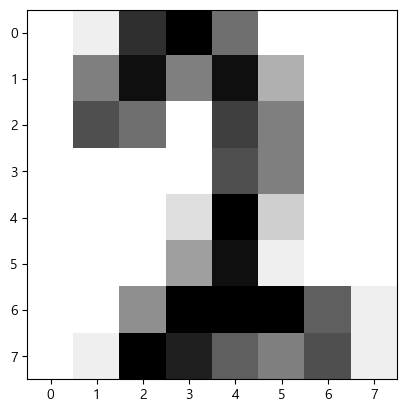

In [48]:
plt.imshow(X_test[10].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')

In [49]:
y_pred = knn.predict([X_test[10]])
y_pred

array([2])